Let's examine the relationship between these two measured variables:

Wing length	Tail length
10.4	7.4
10.8	7.6
11.1	7.9
10.2	7.2
10.3	7.4
10.2	7.1
10.7	7.4
10.5	7.2
10.8	7.8
11.2	7.7
10.6	7.8
11.4	8.3
Assume Wing length is the X variable and Tail Length is the Y variable, both measured in cm.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

1. Plot X vs Y. Do they look related?

<function matplotlib.pyplot.show(close=None, block=None)>

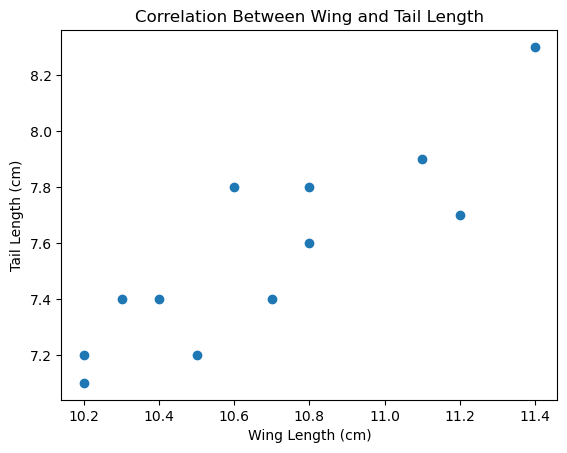

In [12]:
Wing = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
Tail = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

plt.scatter(Wing, Tail)
plt.title("Correlation Between Wing and Tail Length")
plt.xlabel("Wing Length (cm)")
plt.ylabel("Tail Length (cm)")
plt.show


2. Calculate rx,y and ry,x, first using the equations above and then using either the Python numpy function corrcoef or Matlab's built-in corrcoef. Did you get the same answers?

In [11]:
#Calculating rx,y and ry,x manually
#Convert list of variables to an array
x = np.array(Wing)
y = np.array(Tail)

n = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x**2)
sum_y2 = np.sum(y**2)

# Calculate the correlation coefficient
r_xy_manual = (n * sum_xy - sum_x * sum_y) / np.sqrt((n * sum_x2 - sum_x**2) * (n * sum_y2 - sum_y**2))

# Step 2: Using NumPy to calculate correlation coefficient
r_xy_numpy = np.corrcoef(x, y)[0, 1]  # Get the correlation coefficient

# Output the results
print(f'Manual Calculation: r_xy = {r_xy_manual:.4f}')
print(f'NumPy Calculation: r_xy = {r_xy_numpy:.4f}')


Manual Calculation: r_xy = 0.8704
NumPy Calculation: r_xy = 0.8704


3. What is the standard error of rx,y? The 95% confidence intervals computed from the standard error?

In [15]:
#Calculate standard error
s = (((1-r_xy_numpy)**2)/(n-2))**(1/2)

#Calculate the 95% confidence interval
z = np.arctanh(r_xy_numpy)   #Fisher transformation
stdev = 1/np.sqrt(n-3)
alpha = 0.05
z_critical = stats.norm.ppf(1-alpha/2)  #Z-critical value for 95% CI

#Confidence interval in z scale
z_ci_lower = z-z_critical * stdev
z_ci_upper = z+z_critical * stdev

#Transform each confidence interval back to correlation scale
r_ci_lower = np.tanh(z_ci_lower)
r_ci_upper = np.tanh(z_ci_upper)

print(f"The standard error of rx,y is {s:.4f}.")
print(f"The 95% confidence interval is ({r_ci_lower:.4f},{r_ci_upper:.4f}).")

The standard error of rx,y is 0.0410.
The 95% confidence interval is (0.5923,0.9632).


4. Should the value of rx,y be considered significant at the p<0.05 level, given a two-tailed test (i.e., we reject if the test statistic is too large on either tail of the null distribution) for Ho: rx,y = 0?

In [20]:
#Calculate t statistic
t = r_xy_numpy * np.sqrt(df) / np.sqrt(1 - r_xy_numpy**2)

# Step 4: Find the critical t-value for two-tailed test at alpha = 0.05
alpha = 0.05
df = n-2
t_critical = stats.t.ppf(1 - alpha/2, df)

is_significant = abs(t) > t_critical

print(f'Significant at p < 0.05: {is_significant}')


Significant at p < 0.05: True


5. Yale does the exact same study and finds that his correlation value is 0.75. Is this the same as yours? That is, evaluate Ho: r = 0.75

In [23]:
r_yale = 0.75
t_yale = r_yale * np.sqrt(df)/np.sqrt(1-r_yale**2)      #Calculate t-statistic for Yale's correlation

t_critical = stats.t.ppf(1-alpha/2, df)

is_significant_yale = abs(t_yale) > t_critical

print(f'Yale\'s Pearson correlation coefficient (r): {r_yale}')
print(f't-statistic for Yale\'s r: {t_yale:.4f}')
print(f'Critical t-value: {t_critical:.4f}')
print(f'Significant at p < 0.05: {is_significant_yale}')

Yale's Pearson correlation coefficient (r): 0.75
t-statistic for Yale's r: 3.5857
Critical t-value: 2.2281
Significant at p < 0.05: True


6. Finally, calculate the statistical power and sample size needed to reject Ho: r=0 when r >= 0.5

In [26]:
# Parameters
effect_size = 0.5  # True correlation
alpha = 0.05       # Significance level
power_target = 0.80  # Desired power

# Calculate the required sample size to achieve the desired power
# Using the arcsine transformation for the effect size
effect_size_z = np.arctanh(effect_size)  # Fisher transformation

# Calculate required sample size
required_sample_size = sm.stats.NormalIndPower().solve_power(
    effect_size=effect_size_z,
    alpha=alpha,
    power=power_target,
    alternative='two-sided'
)

# Output the required sample size
print(f'Required sample size to achieve power of {power_target} to detect r >= {effect_size}: {np.ceil(required_sample_size)}')

Required sample size to achieve power of 0.8 to detect r >= 0.5: 53.0
